# Analysis of lift and drag coefficients

In [1]:
from os.path import join
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch as pt
from scipy.signal import welch
from utils import normalize_frequency

plt.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

data_path_2D = "./output/naca0012_data/2D/"
data_path_3D = "./output/naca0012_data/3D/"

## 2D simulations

In [2]:
ti_2D, cl_2D, cd_2D = {}, {}, {}
for i in range(3):
    name = f"t_int_ref{i:1d}.pt"
    ti_2D[f"ref. {i:1d}"] = pt.load(join(data_path_2D, name))
    name = f"cl_ref{i:1d}.pt"
    cl_2D[f"ref. {i:1d}"] = pt.load(join(data_path_2D, name))
    name = f"cd_ref{i:1d}.pt"
    cd_2D[f"ref. {i:1d}"] = pt.load(join(data_path_2D, name))

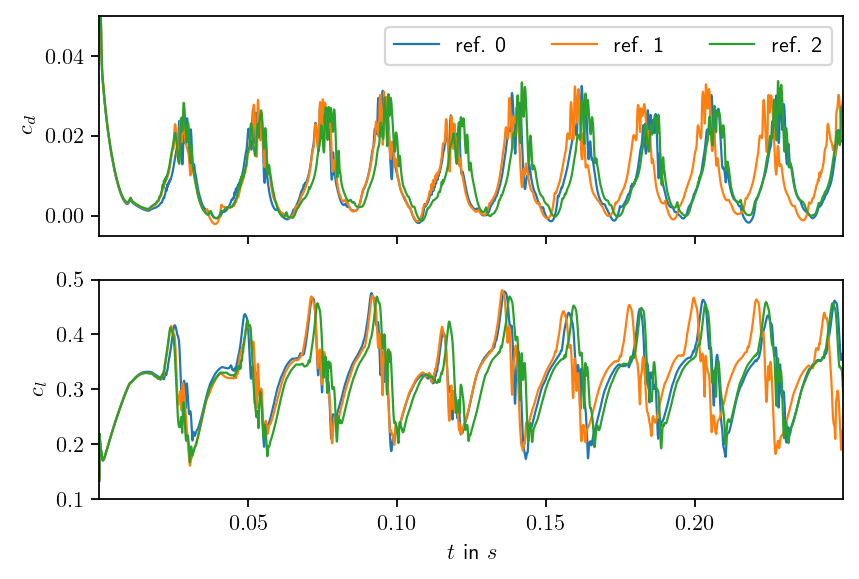

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

for key in ti_2D.keys():
    ax1.plot(ti_2D[key], cd_2D[key], lw=1, label=key)
    ax2.plot(ti_2D[key], cl_2D[key], lw=1)

ax1.legend(ncol=3)
ax1.set_ylim(-0.005, 0.05)
ax1.set_ylabel(r"$c_d$")
ax2.set_xlim(ti_2D["ref. 0"][0], ti_2D["ref. 0"][-1])
ax2.set_ylim(0.1, 0.5)
ax2.set_xlabel(r"$t$ in $s$")
ax2.set_ylabel(r"$c_l$")
plt.show()

In [4]:
f_2D, a_2D = {}, {}

for key in ti_2D.keys():
    cl = cl_2D[key]
    cl = (cl - cl.mean()).squeeze().numpy()
    fs = 1.0 / (ti_2D[key][1] - ti_2D[key][0]).item()
    f, a = welch(cl, fs=fs, nperseg=len(cl), nfft=len(cl))
    top = a.argsort()[-3:][::-1]
    print("Top 3 frequencies: ", normalize_frequency(f[top]))
    f_2D[key] = f
    a_2D[key] = a

Top 3 frequencies:  [0.65101126 0.71019411 1.36120537]
Top 3 frequencies:  [0.71019978 0.65101647 1.36121625]
Top 3 frequencies:  [0.65101386 0.71019694 1.3612108 ]


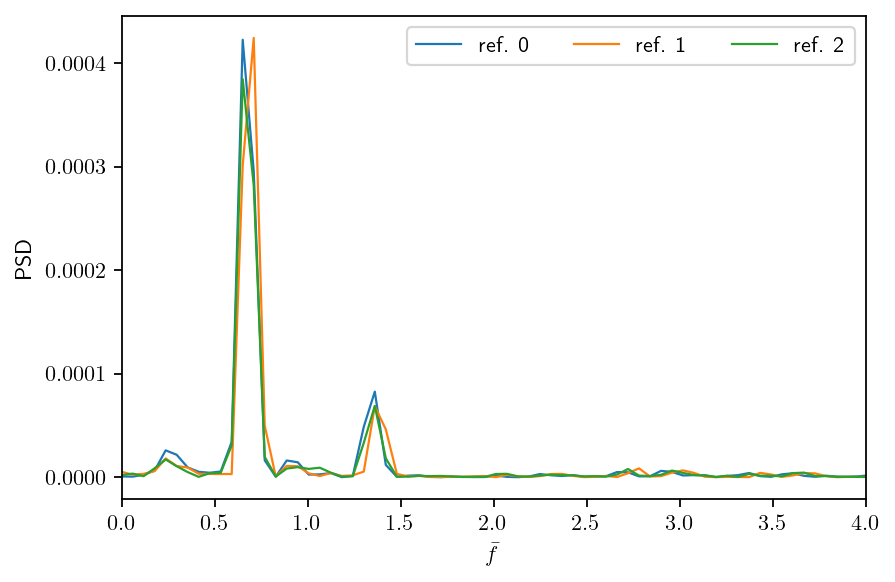

In [5]:
for key in f_2D.keys():
    plt.plot(normalize_frequency(f_2D[key]), a_2D[key], lw=1, label=key)    
plt.xlim(0, 4)
plt.xlabel(r"$\bar{f}$")
plt.ylabel("PSD")
plt.legend(ncol=3)
plt.show()

### 3D simulations

In [6]:
ti_3D, cl_3D, cd_3D = {}, {}, {}
suffixes = ["ref0_z25", "ref0_z50", "ref1_z25"]
labels = [r"ref. 0, $0.2c$", r"ref. 0, $0.4c$", r"ref. 1, $0.2c$"]
for s, l in zip(suffixes, labels):
    name = f"t_int_{s}.pt"
    ti_3D[l] = pt.load(join(data_path_3D, name))
    name = f"cl_{s}.pt"
    cl_3D[l] = pt.load(join(data_path_3D, name))
    name = f"cd_{s}.pt"
    cd_3D[l] = pt.load(join(data_path_3D, name))

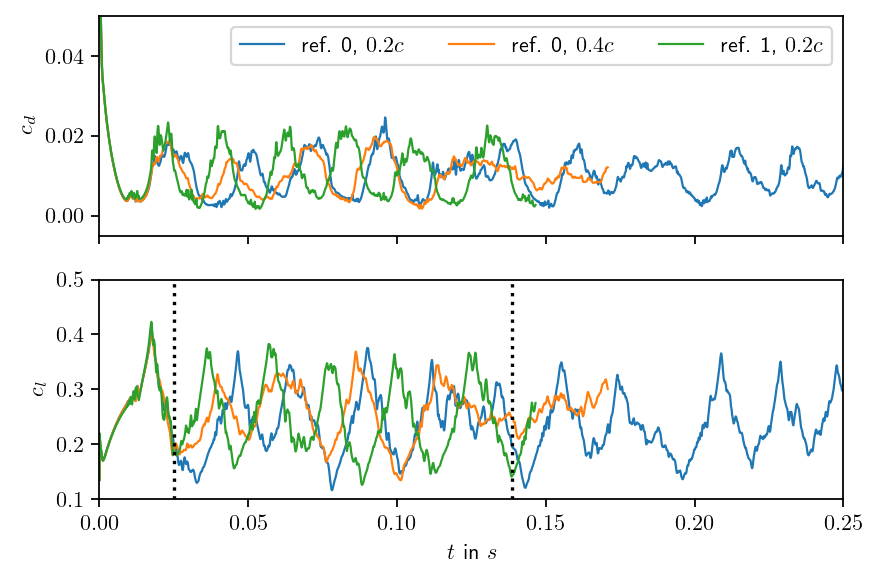

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

for key in ti_3D.keys():
    ax1.plot(ti_3D[key], cd_3D[key], lw=1, label=key)
    ax2.plot(ti_3D[key], cl_3D[key], lw=1)

ax1.legend(ncol=3)
ax1.set_ylim(-0.005, 0.05)
ax1.set_ylabel(r"$c_d$")
ax2.set_xlim(0, 0.25)
ax2.set_ylim(0.1, 0.5)
ax2.set_xlabel(r"$t$ in $s$")
ax2.set_ylabel(r"$c_l$")
ax2.axvline(0.025, ls=":", c="k")
ax2.axvline(0.1385, ls=":", c="k")
plt.show()

In [8]:
f_3D, a_3D = {}, {}

for key in ti_3D.keys():
    t = ti_3D[key]
    start = (t - 0.025).abs().argmin()
    end = (t - 0.1385).abs().argmin()
    cl = cl_3D[key][start:end+1]
    cl = (cl - cl.mean()).squeeze().numpy()
    fs = 1.0 / (ti_3D[key][1] - ti_3D[key][0]).item()
    f, a = welch(cl, fs=fs, nperseg=len(cl), nfft=len(cl))
    top = a.argsort()[-3:][::-1]
    print("Top 3 frequencies: ", normalize_frequency(f[top]))
    f_3D[key] = f
    a_3D[key] = a

Top 3 frequencies:  [0.65166813 0.5213345  0.78200176]
Top 3 frequencies:  [0.52139521 0.65174401 0.39104641]
Top 3 frequencies:  [0.65173183 0.7820782  0.52138547]


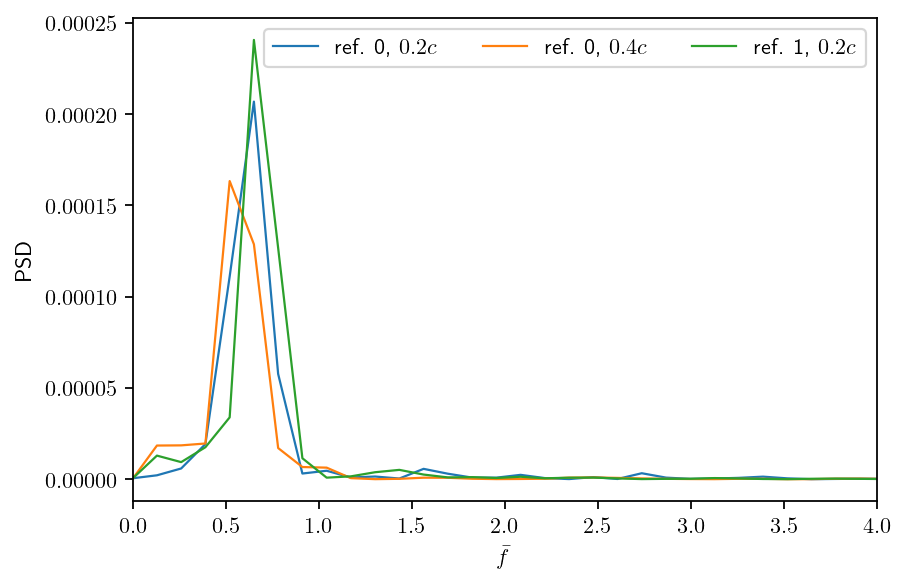

In [9]:
for key in f_3D.keys():
    plt.plot(normalize_frequency(f_3D[key]), a_3D[key], lw=1, label=key)    
plt.xlim(0, 4)
plt.xlabel(r"$\bar{f}$")
plt.ylabel("PSD")
plt.legend(ncol=3)
plt.show()